# Hands-On Assignment 1 (Part 1)
1-1. Linear regression with Startup dataset

1-2. Logistic regression with Titanic dataset

1-3. Gaussian discriminant analysis (Gaussian Naive Bayes) with Iris dataset


## After finishing writing the code for each problem, submit your ipynb file (i.e., this file) to Cybercampus by **10/11 Friday 23:59**

### Submitters are as follows.
 *Note that hands-on assignments can be done collaboratively (**up to 2 students**)*

    Name: Eunwoo Choi
    Student ID: 2317035

    Name:  
    Student ID:




---


## 1-1. Linear regression with Startup dataset


---



Download the startup dataset

- data source: https://www.kaggle.com/datasets/karthickveerakumar/startup-logistic-regression

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IejcELv6fntdfsoVVU0TZdAC8VI1m9qi' -O startups.csv

--2024-10-11 00:05:49--  https://docs.google.com/uc?export=download&id=1IejcELv6fntdfsoVVU0TZdAC8VI1m9qi
Resolving docs.google.com (docs.google.com)... 108.177.119.101, 108.177.119.138, 108.177.119.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IejcELv6fntdfsoVVU0TZdAC8VI1m9qi&export=download [following]
--2024-10-11 00:05:49--  https://drive.usercontent.google.com/download?id=1IejcELv6fntdfsoVVU0TZdAC8VI1m9qi&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436 (2.4K) [application/octet-stream]
Saving to: ‘startups.csv’

startups.csv        100%[===================>]   2.38K  --.-KB/s    

Overview the dataset

In [2]:
import pandas as pd
df = pd.read_csv('startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Visualize the data

Text(0.5, 1.0, 'R&D Spend vs Profit')

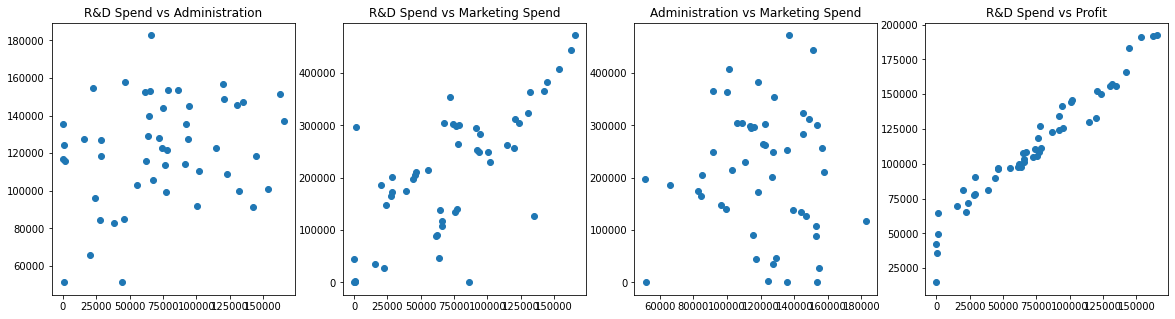

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].scatter(df['R&D Spend'], df['Administration'])
ax[0].set_title('R&D Spend vs Administration')
ax[1].scatter(df['R&D Spend'], df['Marketing Spend'])
ax[1].set_title('R&D Spend vs Marketing Spend')
ax[2].scatter(df['Administration'], df['Marketing Spend'])
ax[2].set_title('Administration vs Marketing Spend')
ax[3].scatter(df['R&D Spend'], df['Profit'])
ax[3].set_title('R&D Spend vs Profit')

## Goal: Use linear regression to fit the function on the data point pairs of x(R&D Spend) and y(Profit)

❗READ CAREFULLY ⬇

*   Use Scikit-learn library directly (Don't use your own to do this)
*   TO-DO:

      1. After fitting, report coefficients and bias you got
      2. Draw the plot of the fitted line over given data points (e.g., refer to the plot below)

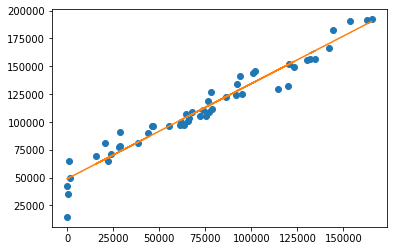






Coefficient (기울기): 0.8542913709388087
Intercept (절편): 49032.89914125215


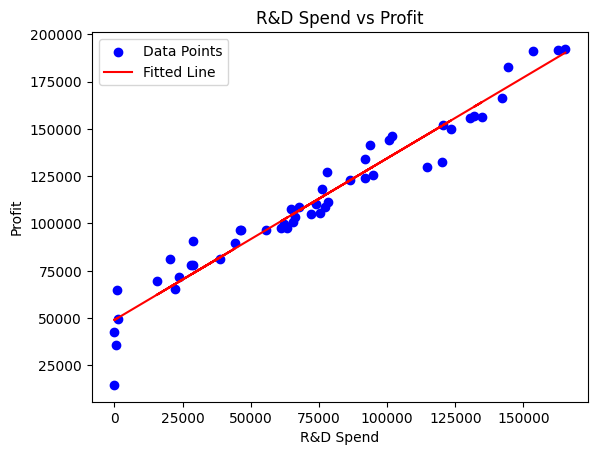

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# R&D Spend과 Profit을 추출하여 회귀 분석
x = df[['R&D Spend']].values
y = df['Profit'].values

model = LinearRegression()
model.fit(x, y)

print(f'Coefficient (기울기): {model.coef_[0]}')
print(f'Intercept (절편): {model.intercept_}')

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(x), color='red', label='Fitted Line')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs Profit')
plt.legend()

plt.show()



---

## 1-2. Logistic regression with Titanic dataset


---



Download the dataset

In [4]:
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm' -O titanic.csv

--2024-10-11 00:14:09--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2024-10-11 00:14:09--  https://docs.google.com/uc?export=download&id=1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm
Resolving docs.google.com (docs.google.com)... 108.177.119.100, 108.177.119.102, 108.177.119.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm&export=download [following]
--2024-10-11 00:14:09--  https://drive.usercontent.google.com/download?id=1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK


Overview the dataset

*   data source: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
*   'Survived' indicates whether or not the passenger survived



In [5]:
df2 = pd.read_csv('titanic.csv')
df2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(df2.shape)

(891, 12)


Assume that 'Pclass' (e.g., first class, second class, economy class, etc), 'Sex', and 'Age' played more important roles in impacting whether the passenger survivced.

Use these three features then.

Data preprocessing done as follows

In [9]:
# In Sex, string type used, convert this to 1 or 0
df2['Sex'] = df2['Sex'].map({'female':1,'male':0})

In [10]:
# In Age, there are missing values. Fill them with average values
df2['Age'].fillna(value=df2['Age'].mean(), inplace=True)


<ipython-input-10-89dc228d8008>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(value=df2['Age'].mean(), inplace=True)


In [11]:
# For further simplicity, divide Pclass into "First class" and "Second class" to use boolean values
df2['FirstClass'] = df2['Pclass'].apply(lambda x: 1 if x == 1 else 0)
df2['SecondClass'] = df2['Pclass'].apply(lambda x: 1 if x == 2 else 0)

In [12]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [13]:
X = df2[['Sex', 'Age', 'FirstClass', 'SecondClass']]
y = df2['Survived']
print(X.shape)
print(y.shape)

(891, 4)
(891,)


In [14]:
# As LR provided by sklearn uses L2 norm as the penalty (by default), the predictor tends to depend on the inputted feature scale
# Also, the scaler helps better prediction when the data points are spread out
from sklearn.preprocessing import StandardScaler
def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  return train_X, test_X

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 데이터셋을 학습용과 테스트용으로 나누기 (75:25 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 스케일링
X_train_scaled, X_test_scaled = scaler_samples(X_train, X_test)

# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측 및 정확도 계산
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# 계수와 절편 출력
coefficients = lr_model.coef_[0]

# 결과 출력
print(f"테스트 세트 정확도: {accuracy * 100:.2f}%")
print(f"모델 계수 (특징의 중요도): {coefficients}")

# 어떤 특징이 중요한지 논의
features = ['Sex', 'Age', 'FirstClass', 'SecondClass']
important_feature = features[np.argmax(np.abs(coefficients))]
print(f"가장 중요한 특징: {important_feature}")


테스트 세트 정확도: 80.27%
모델 계수 (특징의 중요도): [ 1.21258946 -0.36632799  0.87319874  0.52285899]
가장 중요한 특징: Sex


- Sex (Coefficient: 1.2126): Gender has the greatest impact on survival, and females are more likely to survive than males.
- Age (Coefficient: -0.3663): The older the age, the lower the chance of survival.
- FirstClass (Coefficient: 0.8732): First-class passengers have a higher chance of survival.

Me: Female / Approximately 20 years old - It can be said that the chances of survival are high.

## Goal: Train Logistic Regressoin classifier to predict y (whether or not the passenger survived) based on given features (passengers' sex, age, whether or not firstclass, whether or not secondclass)
❗READ CAREFULLY ⬇

*   Use Scikit-learn library directly
*   TO-DO:
  1. Split the dataset into training and testing sets (training:testing=75:25)
  2. Use provided "StandardScaler" function to map all points to have mean=0 and std=1
  3. Train LR classifier using training set
  4. Test a trained LR classifier using testing set and report the testing accuracy
  5. Report your discussion on which feature seems to be more important based on coefficients you got
  6. Test (again) a trained LR classifier using your profile which can be crafted as follows.
      - Example: ME = np.array([1.0, 20.0, 1.0, 0.0])
      - Report whether or not you would survive


In [25]:
ME = np.array([1.0, 20.0, 0.0, 0.0]).reshape(1, -1)

scaler = StandardScaler()
scaler.fit(X_train)  # 원래 X_train을 사용하여 스케일러 맞추기

# 주어진 배열을 스케일링
ME_scaled = scaler.transform(ME)

# 스케일링된 결과 출력
print("스케일링된 주어진 배열:", ME_scaled)

# 로지스틱 회귀 모델을 사용하여 생존 예측
survival_prediction = lr_model.predict(ME_scaled)

print(survival_prediction[0])


스케일링된 주어진 배열: [[ 1.38456873 -0.72892862 -0.54274639 -0.51725447]]
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Me : It can be said that the chances of survival are high.





---

## 1-3. Gaussian discriminant analysis (Gaussian Naive Bayes) with iris dataset


---



Download the dataset

In [26]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv

--2024-10-11 01:50:17--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4549 (4.4K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.44K  --.-KB/s    in 0s      

2024-10-11 01:50:17 (45.5 MB/s) - ‘iris.csv’ saved [4549/4549]



Overview the dataset





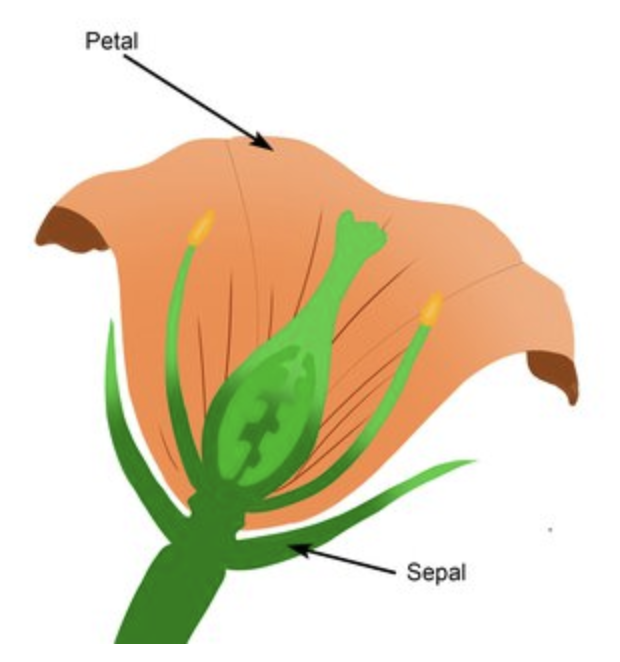

In [27]:
df3 = pd.read_csv('iris.csv', names=["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"])
df3.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data preprocessing

In [28]:
df3['SepalLength'] = df3['SepalLength'].astype(float)
df3['SepalWidth'] = df3['SepalWidth'].astype(float)
df3['PetalLength'] = df3['PetalLength'].astype(float)
df3['PetalWidth'] = df3['PetalWidth'].astype(float)

In [29]:
df3['Species'] = df3['Species'].apply(lambda x: 0 if x == "Iris-virginica" else (1 if x=="Iris-versicolor" else 2))

In [30]:
df3.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [31]:
X = df3[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = df3['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Goal: Use GDA to predict y (what the species of the flower is) based on given features (SepalLength, SepalWidth, PetalLength, PetalWidth)
❗READ CAREFULLY ⬇

*   Use the functions we covered in the lab practice


*   TO-DO:
      1.   Split the dataset into training and testing sets (75:25)
      2.   Using the training set, compute mean and std for each class and report them (Note that we have three classes (i.e., "Iris-virginica" (0), "Iris-versicolor" (1), "Iris-setosa" (2)))
      3.   Using testing set, compute the class probabilities as we did in the lab practice. Report the final prediction labels for each testing sample and testing accuracy.
      4.   Again, test again using the following data and report class prediction probabilities of each class and final prediction label
          - test=[5.7, 2.9, 4.2, 1.3]



In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 각 클래스별 평균과 표준편차 계산
means = X_train.groupby(y_train).mean()
stds = X_train.groupby(y_train).std()

means, stds

(         SepalLength  SepalWidth  PetalLength  PetalWidth
 Species                                                  
 0           6.539474    2.978947     5.534211    2.002632
 1           5.887179    2.751282     4.230769    1.315385
 2           4.997143    3.414286     1.462857    0.242857,
          SepalLength  SepalWidth  PetalLength  PetalWidth
 Species                                                  
 0           0.661505    0.313789     0.541907    0.293614
 1           0.535173    0.316121     0.491054    0.208426
 2           0.337365    0.389678     0.176711    0.111897)

In [40]:
def class_probability(x, mean, std):
    var = std ** 2
    var[var == 0] = 1e-6  # 분산이 0인 경우 작은 값으로 처리
    likelihood = np.prod(np.exp(-0.5 * ((x - mean) ** 2 / var)) / np.sqrt(2 * np.pi * var))
    return likelihood

In [41]:
def predict_gda(X_test, means, stds, y_train):
    class_labels = y_train.unique()
    predictions = []

    for i, row in X_test.iterrows():
        probabilities = {}
        for class_label in class_labels:
            mean = means.loc[class_label].values
            std = stds.loc[class_label].values
            prob = class_probability(row.values, mean, std)
            probabilities[class_label] = prob

        predicted_class = max(probabilities, key=probabilities.get)
        predictions.append(predicted_class)

    return predictions

In [42]:
y_pred = predict_gda(X_test, means, stds, y_train)
accuracy = np.mean(y_pred == y_test)

print(f"테스트 세트 예측 레이블: {y_pred}")
print(f"테스트 세트 정확도: {accuracy * 100:.2f}%")


테스트 세트 예측 레이블: [1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2]
테스트 세트 정확도: 100.00%


In [39]:
test_sample = np.array([5.7, 2.9, 4.2, 1.3])
class_labels = y_train.unique()
probabilities = {}

for class_label in class_labels:
    mean = means.loc[class_label].values
    std = stds.loc[class_label].values

    #분산이 0인경우
    var = std ** 2
    var[var == 0] = 1e-6

    likelihood = np.prod(np.exp(-0.5 * ((test_sample - mean) ** 2 / var)) / np.sqrt(2 * np.pi * var))
    probabilities[class_label] = likelihood

print(f"주어진 데이터의 클래스 확률: {probabilities}")
predicted_label = max(probabilities, key=probabilities.get)
print(f"주어진 데이터의 최종 예측 레이블: {predicted_label}")


주어진 데이터의 클래스 확률: {2: 1.5445379687369237e-72, 0: 0.0009151437342532676, 1: 1.2261803796324655}
주어진 데이터의 최종 예측 레이블: 1
